# Hostility multiclass with simulated data

In this notebook we run the hostility algorithm for multiclass supervised datasets with simulated data (generated with the Normal distribution)

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Normal_dataset_generator import normal_generator3, normal_generator4, normal_generator5
from Hostility_multiclass_algorithm import hostility_measure_multiclass

In [3]:
# Seeds and sizes (in general)
seed0 = 1
seed1 = 2
seed2 = 3
seed3 = 4
seed4 = 5
n0 = 1000
n1 = 1000
n2 = 1000
n3 = 1000
n4 = 1000


### First example: 3 totally separated classes

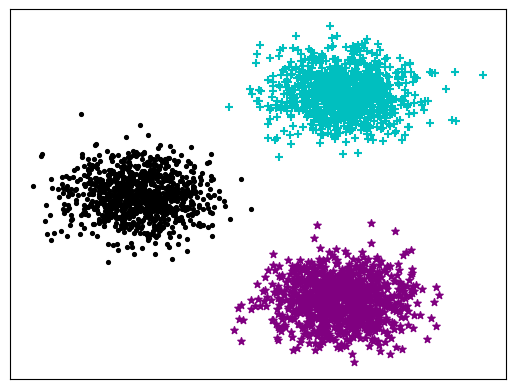

In [4]:
## Dataset multiclass 1 (3 separadas)
mu0 = [0, 0]
sigma0 = [[1, 0], [0, 1]]
mu1 = [6, 5]
sigma1 = [[1, 0], [0, 1]]
mu2 = [6, -5]
sigma2 = [[1, 0], [0, 1]]

X, y = normal_generator3(mu0, sigma0, n0, mu1, sigma1, n1, mu2, sigma2, n2, seed0, seed1, seed2)

sigma = 5
delta = 0.5
seed = 0
k_min = 0
host_instance_by_layer_df, data_clusters, results, results_per_class, probs_per_layer, k_auto = hostility_measure_multiclass(sigma, X, y, k_min, seed=0)



In [5]:
k_auto

4

In [14]:
print("Total hostility of each class and of the dataset (in every layer)")
results


Total hostility of each class and of the dataset (in every layer)


,Host_0,Host_1,Host_2,Dataset_Host
600,0,0,0,0
120,0,0,0,0
24,0,0,0,0
4,0,0,0,0


In [15]:
print('Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)')
results_per_class[k_auto]

Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)


,0,1,2,Total
0,0,0.0,0.0,0.0
1,0.0,0,0.0,0.0
2,0.0,0.0,0,0.0


### Second example

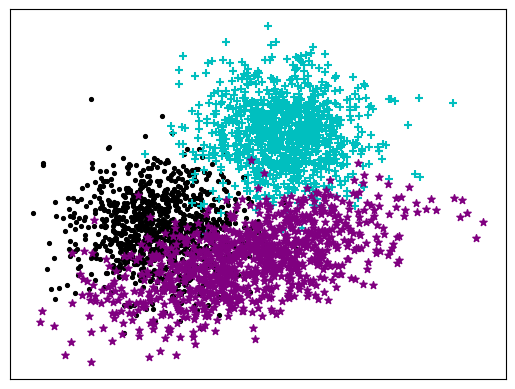

In [17]:

## Dataset multiclass 2
mu0 = [0, 0]
sigma0 = [[1, 0], [0, 1]]
mu1 = [3, 3]
sigma1 = [[1, 0], [0, 1]]
mu2 = [2, -1]
sigma2 = [[3, 1], [1, 1]]

X, y = normal_generator3(mu0, sigma0, n0, mu1, sigma1, n1, mu2, sigma2, n2, seed0, seed1, seed2)


sigma = 5
delta = 0.5
seed = 0
k_min = 0
host_instance_by_layer_df, data_clusters, results, results_per_class, probs_per_layer, k_auto = hostility_measure_multiclass(sigma, X, y, k_min, seed=0)



In [18]:
k_auto

4

In [19]:
print("Total hostility of each class and of the dataset (in every layer)")
results


Total hostility of each class and of the dataset (in every layer)


,Host_0,Host_1,Host_2,Dataset_Host
600,0.122,0.031,0.144,0.099000
120,0.129,0.030,0.132,0.097000
24,0.127,0.028,0.150,0.101667
4,0.129,0.035,0.145,0.103000


In [20]:
print('Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)')
results_per_class[k_auto]

Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)


,0,1,2,Total
0,0,0.012,0.12,0.129
1,0.017,0,0.019,0.035
2,0.125,0.03,0,0.145


Class 0 and 1 have a symmetric overlap, class 2 receives more hostility from class 0 than from class 1. Class 1 receives a similar amount of hostility from class 0 and 2.

### Third example: four classes overlapping two by two

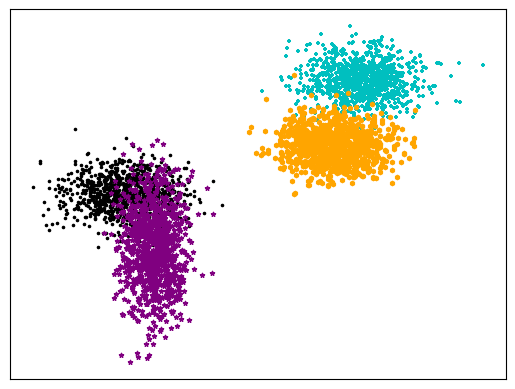

In [21]:

## Dataset multiclass 3
mu0 = [0, 0]
sigma0 = [[1, 0], [0, 1]]
mu1 = [8, 7]
sigma1 = [[1, 0], [0, 1]]
mu2 = [1, -3]
sigma2 = [[0.3, 0], [0, 5]]
mu3 = [7, 3]
sigma3 = [[1, 0], [0, 1]]

X, y = normal_generator4(mu0, sigma0, n0, mu1, sigma1, n1, mu2, sigma2, n2, mu3, sigma3, n3, seed0, seed1, seed2, seed3)



sigma = 5
delta = 0.5
seed = 0
k_min = 0
host_instance_by_layer_df, data_clusters, results, results_per_class, probs_per_layer, k_auto = hostility_measure_multiclass(sigma, X, y, k_min, seed=0)


In [22]:
k_auto

800

In [23]:
print("Total hostility of each class and of the dataset (in every layer)")
results

Total hostility of each class and of the dataset (in every layer)


,Host_0,Host_1,Host_2,Host_3,Dataset_Host
800,0.091,0.012,0.155,0.020,0.06950
160,0.067,0.021,0.165,0.013,0.06650
32,0.045,0.031,0.191,0.010,0.06925
6,0.100,0.032,0.145,0.011,0.07200


In [24]:
print('Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)')
results_per_class[k_auto]

Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)


,0,1,2,3,Total
0,0,0.0,0.091,0.0,0.091
1,0.0,0,0.0,0.012,0.012
2,0.155,0.0,0,0.0,0.155
3,0.0,0.02,0.0,0,0.02


The results reveal with no problem that the classes receive hostility in pairs. The class 2 (violet) is the one suffering more, in particular from class 0 (black). Class 1 and 3 have a similar amount of hostility, caused by each other.

### Fourth example: one class overlapping with all the rest

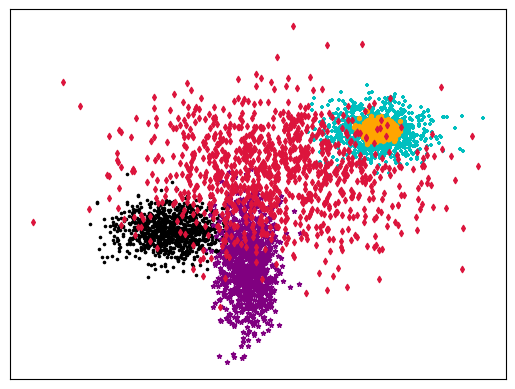

In [25]:
mu0 = [0, 0]
sigma0 = [[1, 0], [0, 1]]
mu1 = [8, 7]
sigma1 = [[1, 0], [0, 1]]
mu2 = [3, -2]
sigma2 = [[0.3, 0], [0, 5]]
mu3 = [8, 7]
sigma3 = [[0.1, 0], [0, 0.1]]
mu4 = [4, 4]
sigma4 = [[7, 0], [0, 8]]

X, y = normal_generator5(mu0, sigma0, n0, mu1, sigma1, n1, mu2, sigma2, n2, mu3, sigma3, n3, mu4, sigma4, n4, seed0, seed1, seed2, seed3, seed4)



sigma = 5
delta = 0.5
seed = 0
k_min = 0
host_instance_by_layer_df, data_clusters, results, results_per_class, probs_per_layer, k_auto = hostility_measure_multiclass(sigma, X, y, k_min, seed=0)



In [26]:
k_auto

1000

In [27]:
print("Total hostility of each class and of the dataset (in every layer)")
results

Total hostility of each class and of the dataset (in every layer)


,Host_0,Host_1,Host_2,Host_3,Host_4,Dataset_Host
1000,0.045,0.274,0.069,0.088,0.197,0.1346
200,0.033,0.228,0.065,0.105,0.181,0.1224
40,0.030,0.265,0.081,0.091,0.180,0.1294
8,0.030,0.255,0.083,0.091,0.203,0.1324


In [28]:
print('Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)')
results_per_class[k_auto]

Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)


,0,1,2,3,4,Total
0,0,0.0,0.03,0.0,0.026,0.045
1,0.0,0,0.0,0.236,0.038,0.274
2,0.019,0.0,0,0.0,0.059,0.069
3,0.0,0.088,0.0,0,0.002,0.088
4,0.055,0.072,0.084,0.011,0,0.197


Class 5 is receiving hostility from all the classes. Class 1 receives important hostility from class 3, which is totally inside of it.

### Fifth example: Class 1 and 2 imbalanced

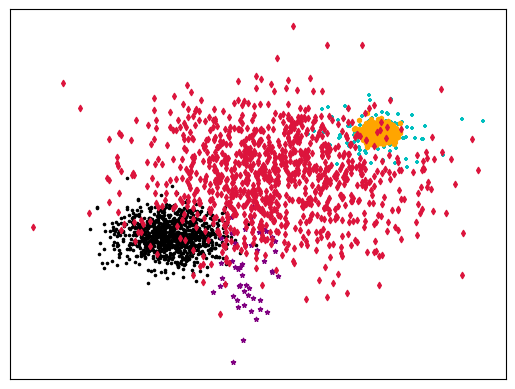

In [29]:
## Dataset multiclass 5
mu0 = [0, 0]
sigma0 = [[1, 0], [0, 1]]
mu1 = [8, 7]
sigma1 = [[1, 0], [0, 1]]
mu2 = [3, -2]
sigma2 = [[0.3, 0], [0, 5]]
mu3 = [8, 7]
sigma3 = [[0.1, 0], [0, 0.1]]
mu4 = [4, 4]
sigma4 = [[7, 0], [0, 8]]

n1 = 100
n2 = 50

X, y = normal_generator5(mu0, sigma0, n0, mu1, sigma1, n1, mu2, sigma2, n2, mu3, sigma3, n3, mu4, sigma4, n4, seed0, seed1, seed2, seed3, seed4)



sigma = 5
delta = 0.5
seed = 0
k_min = 0
host_instance_by_layer_df, data_clusters, results, results_per_class, probs_per_layer, k_auto = hostility_measure_multiclass(sigma, X, y, k_min, seed=0)



In [30]:
k_auto

630

In [31]:
print("Total hostility of each class and of the dataset (in every layer)")
results

Total hostility of each class and of the dataset (in every layer)


,Host_0,Host_1,Host_2,Host_3,Host_4,Dataset_Host
630,0.024,0.59,0.34,0.009,0.093,0.064127
126,0.020,0.61,0.34,0.003,0.080,0.057460
25,0.018,0.84,0.34,0.001,0.086,0.065397


In [32]:
print('Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)')
results_per_class[k_auto]

Pairwise hostility per classes. Rows: who is receiving hostility, columns: who is causing the hostility (proportion of points (row) receiving hostility from the class in the column)


,0,1,2,3,4,Total
0,0,0.0,0.004,0.0,0.024,0.024
1,0.0,0,0.0,0.39,0.26,0.59
2,0.06,0.0,0,0.0,0.32,0.34
3,0.0,0.009,0.0,0,0.001,0.009
4,0.058,0.015,0.012,0.014,0,0.093


When reducing the size of class 1 or 2, their hostility increase.